<a href="https://colab.research.google.com/github/Muskan520/Stock-prediction-models/blob/main/fbprophet_Volkswagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import math



In [2]:
df= pd.read_csv('/content/VWAGY.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-07,21.221500,21.570000,21.209999,21.400000,20.717226,92400
1,2013-06-10,21.770000,21.850000,21.629999,21.760000,21.065741,112600
2,2013-06-11,21.150000,21.320000,21.045000,21.045000,20.373552,138000
3,2013-06-12,20.775000,20.844999,20.540001,20.545000,19.889505,113600
4,2013-06-13,20.450001,20.745001,20.299999,20.745001,20.083126,76400
...,...,...,...,...,...,...,...
2008,2021-05-28,36.084999,36.599998,35.939999,36.165001,36.165001,837300
2009,2021-06-01,36.299000,36.740002,36.270000,36.669998,36.669998,603900
2010,2021-06-02,37.736000,37.973999,37.500000,37.720001,37.720001,628800
2011,2021-06-03,37.410000,37.599998,36.360001,37.500000,37.500000,620700


In [3]:
df.shape

(2013, 7)

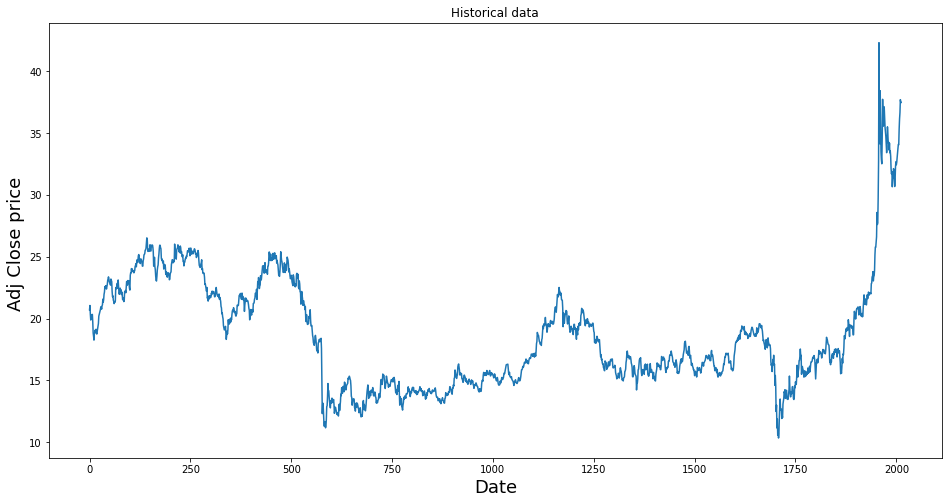

In [4]:
#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Historical data')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price ',fontsize=18)
plt.show()


In [5]:
# Select only the important features i.e. the date and price
data = df[["Date","Adj Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Adj Close":"y"}) #renaming the columns of the dataset
data.head(5)




,ds,y
0,2013-06-07,20.717226
1,2013-06-10,21.065741
2,2013-06-11,20.373552
3,2013-06-12,19.889505
4,2013-06-13,20.083126


In [6]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data (not splitting in train and test data.Training all data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


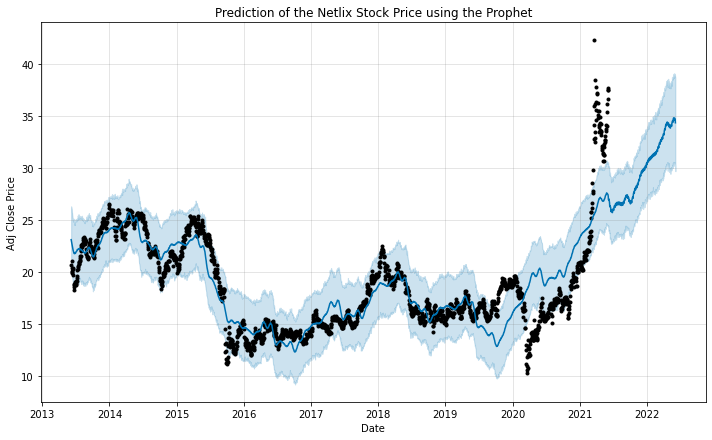

In [7]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Netlix Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.show()